In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load the datasets
# Load the datasets
df_familia_pessoas_final = pd.read_csv('df_modelo.csv', sep=',')
#df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [ ]:
df_familia_pessoas_final = df_familia_pessoas_final.drop('id_familia', axis=1)

In [ ]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final.drop('classe_renda', axis=1)

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96502, 46)


,uf_ibge,classf,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,42,2,1.0,5.0,5.0,1.0,2.0,2.0,0.0,4,...,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.5,0.0,6.3
1,29,3,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,5.1
2,35,3,1.0,5.0,5.0,1.0,2.0,2.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,5.7
3,33,2,1.0,3.0,5.0,1.0,2.0,2.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,4.7
4,28,1,1.0,4.0,5.0,1.0,2.0,2.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,4.6


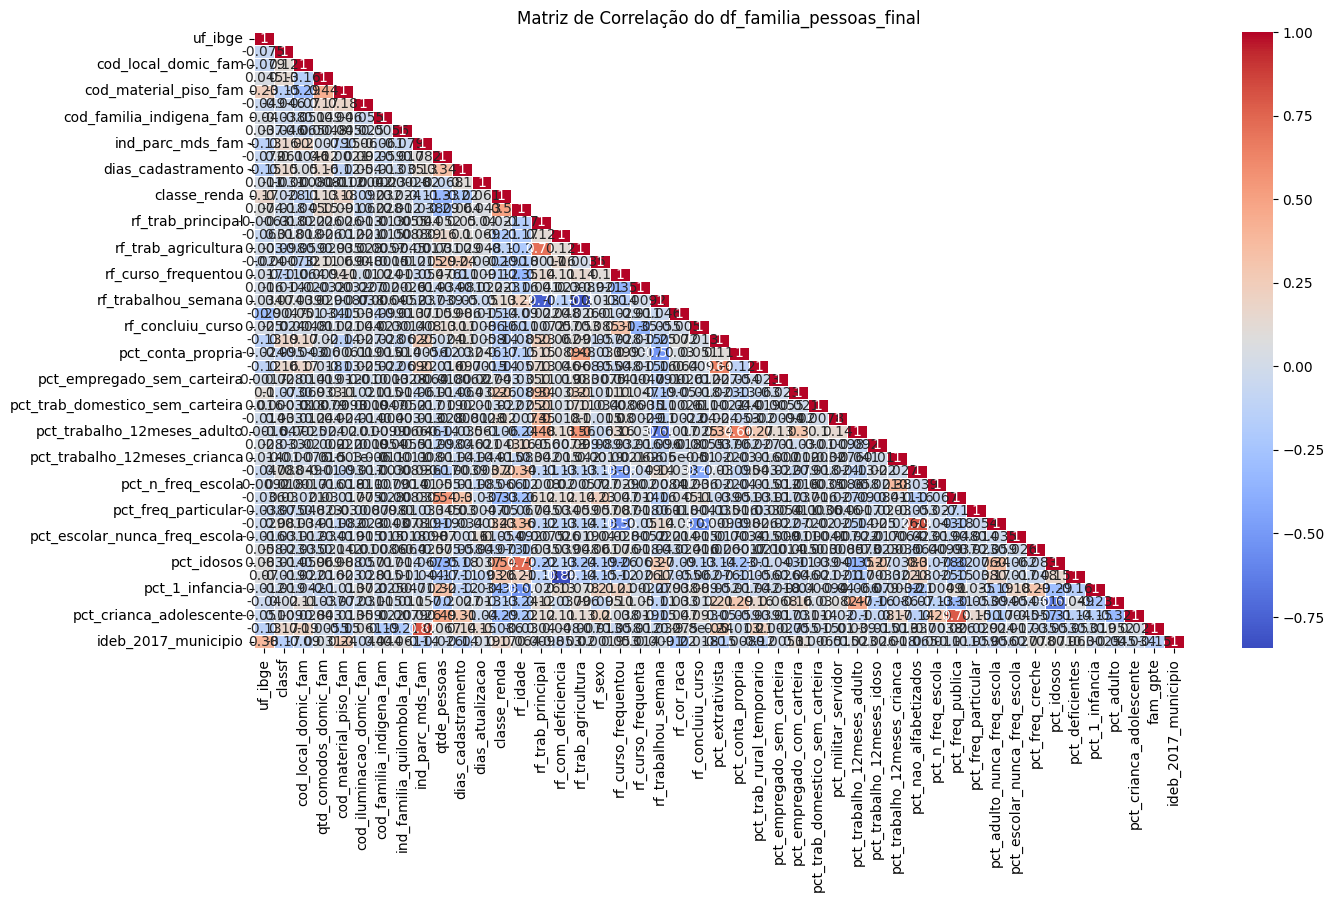

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotando o gráfico de correlações com a máscara
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação do df_familia_pessoas_final')
plt.show()

In [ ]:
df_familia_pessoas_final = df_familia_pessoas_final.drop(['ind_parc_mds_fam'], axis=1)

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

# Fazendo um pipeline comparando diversos modelos

In [ ]:
!pip install xgboost -q

In [ ]:
!pip install catboost -q

In [ ]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # This line was added to import the missing class
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model


# 1. Definição dos Modelos

In [ ]:
# Definir os modelos e os parâmetros
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [ ]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Melhores hiperparâmetros para LogisticRegression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Modelo: KNN
  F1 Score: 0.68
  Acurácia: 0.76


              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85     11275
         1.0       0.58      0.40      0.47      4120
         2.0       0.74      0.72      0.73      3906

    accuracy                           0.76     19301
   macro avg       0.71      0.67      0.68     19301
weighted avg       0.74      0.76      0.75     19301





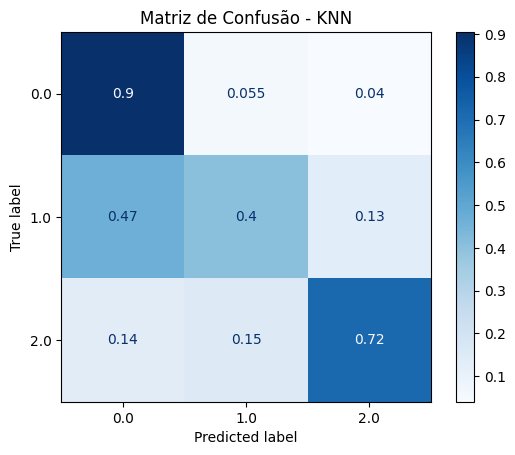



Modelo: LogisticRegression
  F1 Score: 0.66
  Acurácia: 0.76


              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85     11275
         1.0       0.62      0.32      0.42      4120
         2.0       0.72      0.73      0.72      3906

    accuracy                           0.76     19301
   macro avg       0.71      0.66      0.66     19301
weighted avg       0.74      0.76      0.73     19301





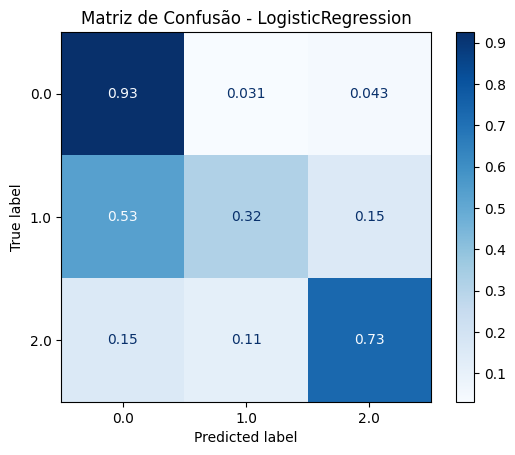



Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.77


              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     11275
         1.0       0.64      0.47      0.54      4120
         2.0       0.76      0.70      0.73      3906

    accuracy                           0.77     19301
   macro avg       0.74      0.69      0.71     19301
weighted avg       0.76      0.77      0.76     19301





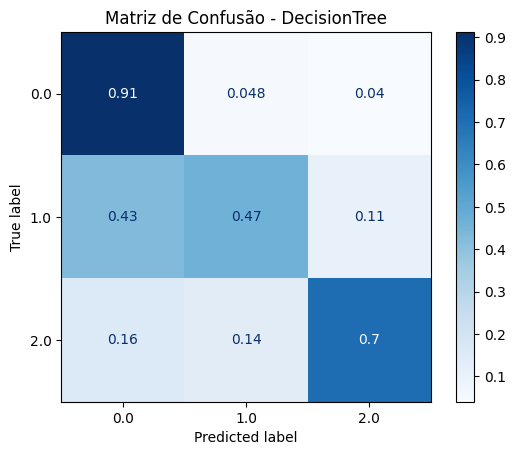



Modelo: RandomForest
  F1 Score: 0.73
  Acurácia: 0.79


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     11275
         1.0       0.64      0.51      0.57      4120
         2.0       0.77      0.74      0.75      3906

    accuracy                           0.79     19301
   macro avg       0.75      0.72      0.73     19301
weighted avg       0.78      0.79      0.78     19301





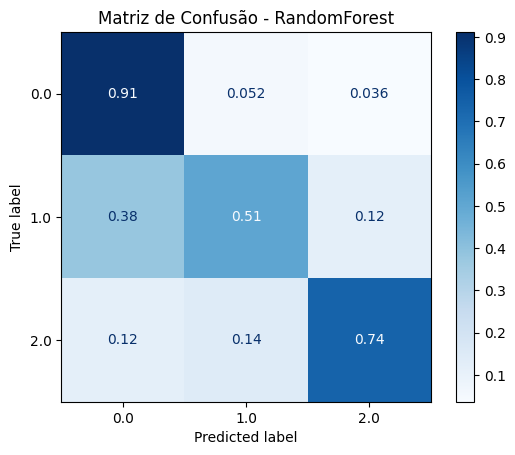



Modelo: XGBoost
  F1 Score: 0.74
  Acurácia: 0.80


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     11275
         1.0       0.66      0.53      0.58      4120
         2.0       0.77      0.75      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.76      0.73      0.74     19301
weighted avg       0.79      0.80      0.79     19301





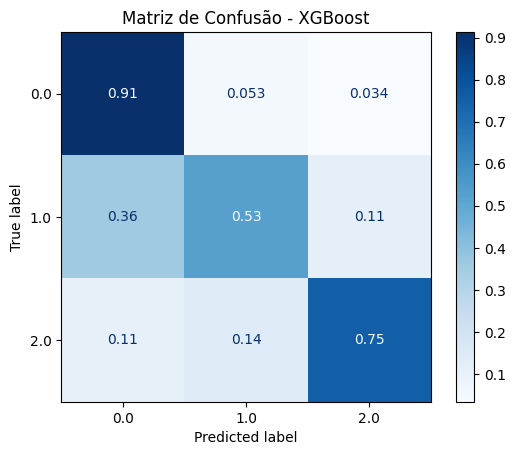



Modelo: CatBoost
  F1 Score: 0.74
  Acurácia: 0.80


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     11275
         1.0       0.65      0.52      0.58      4120
         2.0       0.78      0.75      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.76      0.73      0.74     19301
weighted avg       0.79      0.80      0.79     19301





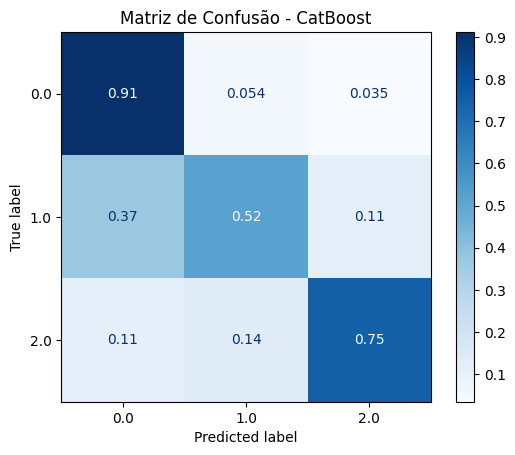

In [ ]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")
    print("\n")
    print(classification_report(y_test, y_pred))
    print("\n")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',normalize='true')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()
    print("\n")



# 5. Análise da Importância das Features com LIME

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

In [ ]:
!pip install lime

In [ ]:
import numpy as np
import lime
from lime import lime_tabular

import warnings
warnings.filterwarnings("ignore")

# Importância das features para cada modelo
for model_name, model in best_models.items():

    print (model_name)
    print("\n")
      # Use LIME to explain predictions
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,  # Convert X_train to a NumPy array
        feature_names=X_train.columns.tolist(),  # Convert columns to a list
        class_names=["0.0", "1.0", "2.0"],
        mode="classification"
    )
    # Explicar uma instância específica (substitua pelo índice da instância desejada)
    instance = X_train.iloc[0].values  # Convert instance to a NumPy array
    exp = explainer.explain_instance(instance, model.predict_proba, num_features=10)

    # Imprimir a explicação
    print(exp.as_list())

    # Extrair as importâncias das features da explicação
    lime_importances = {}
    for feature, weight in exp.as_list():
        lime_importances[feature] = abs(weight)

    # Ordenar as features por importância LIME
    sorted_features = sorted(lime_importances, key=lime_importances.get, reverse=True)

    print(f"Importância das features usando LIME para {model_name}:")
    for feature in sorted_features:
        print(f"{feature}: {lime_importances[feature]}")
    print ('\n')
    print ('------------------------------------------------------------------------\n')


KNN


[('pct_empregado_com_carteira > 0.00', 0.1746383265036799), ('pct_deficientes <= 0.00', -0.12846744848507713), ('pct_militar_servidor <= 0.00', -0.12722178315206928), ('pct_empregado_sem_carteira <= 0.00', -0.11263924970423295), ('pct_1_infancia <= 0.00', 0.07358421314101322), ('rf_idade > 52.00', 0.06798338160723032), ('pct_idosos <= 0.00', -0.06035639975418551), ('ideb_2017_municipio <= 4.70', -0.054671929208357783), ('pct_escolar_nunca_freq_escola <= 0.00', -0.04846429026277975), ('pct_trab_domestico_sem_carteira <= 0.00', -0.038628240524008234)]
Importância das features usando LIME para KNN:
pct_empregado_com_carteira > 0.00: 0.1746383265036799
pct_deficientes <= 0.00: 0.12846744848507713
pct_militar_servidor <= 0.00: 0.12722178315206928
pct_empregado_sem_carteira <= 0.00: 0.11263924970423295
pct_1_infancia <= 0.00: 0.07358421314101322
rf_idade > 52.00: 0.06798338160723032
pct_idosos <= 0.00: 0.06035639975418551
ideb_2017_municipio <= 4.70: 0.054671929208357783
pct_escolar_nu

## 7. Classificação com os parâmetros LIME


#7.1 - Classificação + ponderando pelo peso da classe

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
# Import recall_score and make_scorer
from sklearn.metrics import recall_score, make_scorer

# Import BayesSearchCV
from skopt import BayesSearchCV

#7.1.1 XBC

Melhores hiperparâmetros com scale_pos_weight: OrderedDict([('xgb__classifier__learning_rate', 0.1), ('xgb__max_depth', 4), ('xgb__n_estimators', 295)])
  F1 Score: 0.74
  Acurácia: 0.22


Classification report para XGBoost com scale_pos_weight: 

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     11275
         1.0       0.64      0.53      0.58      4120
         2.0       0.77      0.75      0.76      3906

    accuracy                           0.80     19301
   macro avg       0.75      0.73      0.74     19301
weighted avg       0.79      0.80      0.79     19301





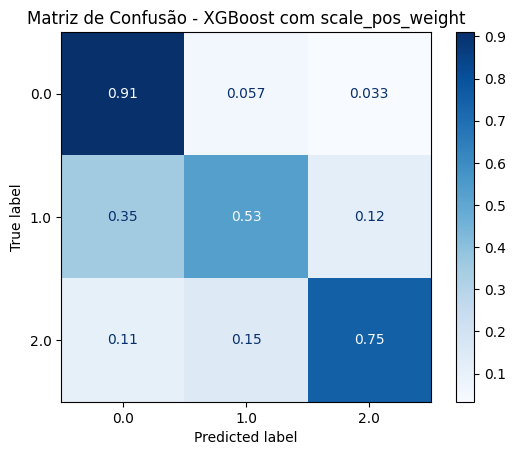

In [ ]:
# Definir hiperparâmetros para a busca bayesiana
param_grid_bayes = {
    'xgb__n_estimators': [250, 300],
    'xgb__classifier__learning_rate': [0.1],
    'xgb__max_depth': [3, 5]
}

max = y.value_counts().max()
min = y.value_counts().min()
scale_pos_weight = max / min

# Criar pipeline com RobustScaler e XGBoost Classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        random_state=1,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

# Realizar a busca bayesiana com validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Usar recall como métrica de scoring, especificando average='weighted'
scorer = make_scorer(recall_score, average='weighted')

bayes_search_xgb = BayesSearchCV(
    pipeline_xgb,
    search_spaces=param_grid_bayes,
    n_iter=30,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    random_state=1
)

# Ajustar o modelo ao conjunto de treino balanceado por pesos scale_pos_weight
bayes_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = bayes_search_xgb.best_estimator_

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros com scale_pos_weight: {bayes_search_xgb.best_params_}")

# Fazer previsões com o conjunto de teste original
y_pred_xgb_smote = best_xgb_model.predict(X_test)
# Calcular F1 Score
f1 = f1_score(y_test, y_pred_xgb_smote, average='macro')
# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred_xgb_smote)

# Exibir os resultados
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
# Relatório de classificação
classification_report_xgb = classification_report(y_test, y_pred_xgb_smote)
print('Classification report para XGBoost com scale_pos_weight: \n')
print(classification_report_xgb)
print("\n")
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão - XGBoost com scale_pos_weight')
plt.show()
print("\n")



In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb_smote)

# Exibir os resultados
print(f"  Acurácia: {accuracy:.2f}")

  Acurácia: 0.80


#7.1.2 CatBoosting

In [ ]:
!pip install catboost scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt
from skopt import BayesSearchCV

Melhores hiperparâmetros com scale_pos_weight: OrderedDict([('xgb__depth', 4), ('xgb__iterations', 265), ('xgb__learning_rate', 0.1)])
  F1 Score: 0.73
  Acurácia: 0.79


Classification report para XGBoost com scale_pos_weight: 

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     11275
         1.0       0.65      0.51      0.58      4120
         2.0       0.77      0.74      0.76      3906

    accuracy                           0.79     19301
   macro avg       0.75      0.72      0.73     19301
weighted avg       0.78      0.79      0.79     19301





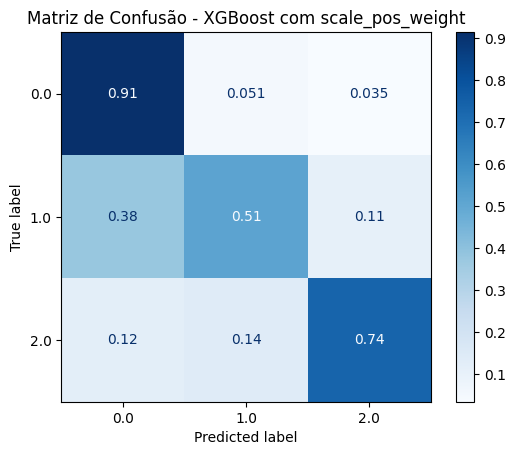

In [ ]:
# Definir hiperparâmetros para a busca bayesiana
param_grid_bayes = {
    'xgb__iterations': [250, 500],
    'xgb__depth': [3, 5],
    'xgb__learning_rate': [0.1]
}

max = y.value_counts().max()
min = y.value_counts().min()
scale_pos_weight = max / min

# Criar pipeline com RobustScaler e XGBoost Classifier
pipeline_catboost = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', CatBoostClassifier(
        random_state=1,
        # Use 'Logloss' for binary classification and enable scale_pos_weight
        loss_function='Logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

# Realizar a busca bayesiana com validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Usar recall como métrica de scoring, especificando average='weighted'
scorer = make_scorer(recall_score, average='weighted')

bayes_search_xgb = BayesSearchCV(
    pipeline_xgb,
    search_spaces=param_grid_bayes,
    n_iter=30,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    random_state=1
)

# Ajustar o modelo ao conjunto de treino balanceado por pesos scale_pos_weight
bayes_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = bayes_search_xgb.best_estimator_

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros com scale_pos_weight: {bayes_search_xgb.best_params_}")

# Fazer previsões com o conjunto de teste original
y_pred_xgb_smote = best_xgb_model.predict(X_test)
# Calcular F1 Score
f1 = f1_score(y_test, y_pred_xgb_smote, average='macro')
# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred_xgb_smote)

# Exibir os resultados
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
# Relatório de classificação
classification_report_xgb = classification_report(y_test, y_pred_xgb_smote)
print('Classification report para XGBoost com scale_pos_weight: \n')
print(classification_report_xgb)
print("\n")
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão - XGBoost com scale_pos_weight')
plt.show()
print("\n")

#8. Com seleção de parâmetros - LIME


#8.1 Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = df_familia_pessoas_final [['pct_empregado_com_carteira',
                                  'pct_idosos',
                                  'pct_deficientes',
                                  'pct_militar_servidor',
                                  'rf_idade',
                                  'qtde_pessoas',
                                  'cod_material_piso_fam',
                                  'pct_1_infancia',
                                  'ideb_2017_municipio',
                                  'pct_trab_rural_temporario',
                                  'classe_renda']]

In [ ]:
# Assumindo que a última coluna é o target (ajuste se necessário):
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Criar o classificador com os hiperparâmetros especificados
clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Treinar o modelo
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Modelo: Random Forest
  F1 Score: 0.65
  Acurácia: 0.72


              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82     11275
         1.0       0.50      0.44      0.47      4120
         2.0       0.68      0.66      0.67      3906

    accuracy                           0.72     19301
   macro avg       0.66      0.65      0.65     19301
weighted avg       0.71      0.72      0.72     19301





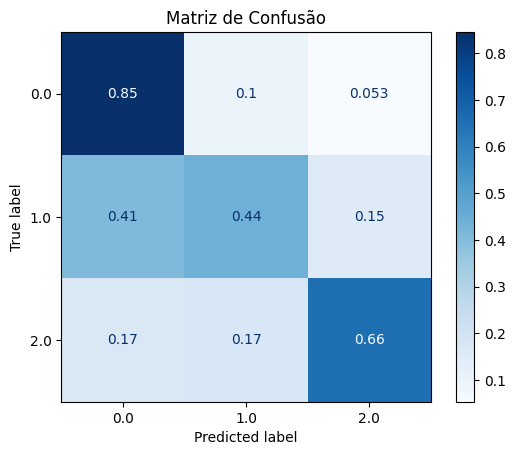

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test_scaled)

# Avaliar o modelo (escolha a métrica adequada para o seu problema)
# Calcular F1 Score
f1 = f1_score(y_test, y_pred, average='macro')

# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Exibir os resultados
print(f"Modelo: Random Forest")
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão')
plt.show()
print("\n")

#8.2 XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
df = df_familia_pessoas_final [['pct_empregado_com_carteira',
                                'qtde_pessoas',
                                'pct_militar_servidor',
                                'pct_idosos',
                                'pct_deficientes',
                                'pct_escolar_nunca_freq_escola',
                                'classe_renda']]


In [ ]:
# Assumindo que a última coluna é o target (ajuste se necessário):
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Criar o classificador XGBoost com os hiperparâmetros especificados
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)

# Treinar o modelo
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Modelo: XGCBosting
  F1 Score: 0.70
  Acurácia: 0.76


              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     11275
         1.0       0.59      0.49      0.54      4120
         2.0       0.74      0.68      0.71      3906

    accuracy                           0.76     19301
   macro avg       0.72      0.69      0.70     19301
weighted avg       0.75      0.76      0.76     19301





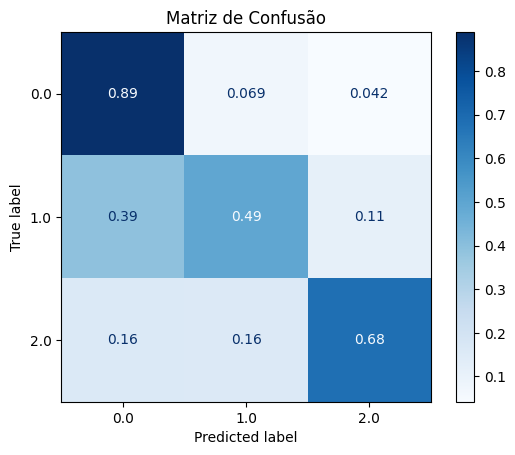

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = xgb_model.predict(X_test_scaled)

# Calcular F1 Score
f1 = f1_score(y_test, y_pred, average='macro')

# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Exibir os resultados
print(f"Modelo: XGCBosting")
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão')
plt.show()
print("\n")

## 8.3 CatBoosting

In [5]:
df = df_familia_pessoas_final [['pct_idosos',
                                'pct_empregado_com_carteira',
                                'pct_militar_servidor',
                                'rf_idade',
                                'qtde_pessoas',
                                'pct_deficientes',
                                'pct_trabalho_12meses_idoso',
                                'pct_trabalho_12meses_crianca',
                                'pct_trab_domestico_sem_carteira',
                                'pct_adulto',
                                'classe_renda']]



In [6]:
# Assumindo que a última coluna é o target (ajuste se necessário):
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00


In [10]:
# Criar o classificador CatBoost com os hiperparâmetros especificados

catboost_model = CatBoostClassifier(
    learning_rate=0.1,
    depth=2,
    iterations=600,
    loss_function='MultiClass'  # Para classificação multiclasse, ajuste conforme necessário
)

# Treinar o modelo
catboost_model.fit(X_train_scaled, y_train)

0:	learn: 1.0340907	total: 130ms	remaining: 1m 17s
1:	learn: 0.9846920	total: 174ms	remaining: 52.1s
2:	learn: 0.9450960	total: 242ms	remaining: 48.2s
3:	learn: 0.9134147	total: 271ms	remaining: 40.3s
4:	learn: 0.8848413	total: 308ms	remaining: 36.6s
5:	learn: 0.8612732	total: 385ms	remaining: 38.1s
6:	learn: 0.8414566	total: 444ms	remaining: 37.6s
7:	learn: 0.8241330	total: 500ms	remaining: 37s
8:	learn: 0.8095817	total: 538ms	remaining: 35.3s
9:	learn: 0.7964427	total: 568ms	remaining: 33.5s
10:	learn: 0.7832279	total: 599ms	remaining: 32.1s
11:	learn: 0.7733356	total: 635ms	remaining: 31.1s
12:	learn: 0.7626445	total: 666ms	remaining: 30.1s
13:	learn: 0.7538401	total: 712ms	remaining: 29.8s
14:	learn: 0.7459095	total: 753ms	remaining: 29.4s
15:	learn: 0.7393367	total: 800ms	remaining: 29.2s
16:	learn: 0.7326469	total: 842ms	remaining: 28.9s
17:	learn: 0.7266865	total: 880ms	remaining: 28.5s
18:	learn: 0.7198331	total: 920ms	remaining: 28.1s
19:	learn: 0.7153939	total: 963ms	remainin

In [ ]:
# Criar o classificador CatBoost com os hiperparâmetros especificados

catboost_model = CatBoostClassifier(
    learning_rate=0.1,
    depth=7,
    iterations=500,
    loss_function='MultiClass'  # Para classificação multiclasse, ajuste conforme necessário
)

# Treinar o modelo
catboost_model.fit(X_train_scaled, y_train)

0:	learn: 1.0158093	total: 124ms	remaining: 1m 1s
1:	learn: 0.9538414	total: 191ms	remaining: 47.6s
2:	learn: 0.9049635	total: 257ms	remaining: 42.6s
3:	learn: 0.8646115	total: 327ms	remaining: 40.5s
4:	learn: 0.8318073	total: 398ms	remaining: 39.4s
5:	learn: 0.8035194	total: 464ms	remaining: 38.2s
6:	learn: 0.7797939	total: 525ms	remaining: 36.9s
7:	learn: 0.7586401	total: 594ms	remaining: 36.5s
8:	learn: 0.7412810	total: 680ms	remaining: 37.1s
9:	learn: 0.7255960	total: 728ms	remaining: 35.7s
10:	learn: 0.7124211	total: 775ms	remaining: 34.4s
11:	learn: 0.7010582	total: 905ms	remaining: 36.8s
12:	learn: 0.6916991	total: 1.04s	remaining: 39.2s
13:	learn: 0.6832465	total: 1.12s	remaining: 39s
14:	learn: 0.6749960	total: 1.2s	remaining: 38.9s
15:	learn: 0.6677103	total: 1.31s	remaining: 39.6s
16:	learn: 0.6620547	total: 1.46s	remaining: 41.5s
17:	learn: 0.6562807	total: 1.55s	remaining: 41.5s
18:	learn: 0.6505663	total: 1.66s	remaining: 42s
19:	learn: 0.6458630	total: 1.79s	remaining: 4

In [18]:
!pip install scikit-learn
from sklearn.metrics import f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
 y_probs = catboost_model.predict_proba(X_test)

Classe 0: [0.12684699 0.12684699 0.10424265 ... 0.21329497 0.28076306 0.05228055]
Classe 1: [0.80093279 0.80093279 0.77361243 ... 0.77458778 0.70838136 0.7167766 ]
Classe 2: [0.07222022 0.07222022 0.12214492 ... 0.01211724 0.01085558 0.23094284]
Modelo: CatBoosting
  F1 Score: 0.25
  Acurácia: 0.58


              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74     11275
         1.0       0.05      0.00      0.01      4120
         2.0       0.00      0.00      0.00      3906

    accuracy                           0.58     19301
   macro avg       0.21      0.33      0.25     19301
weighted avg       0.36      0.58      0.43     19301





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


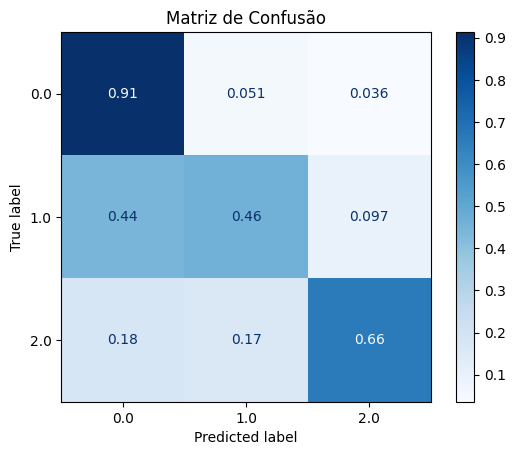

In [22]:
threshold = [0.6,0.2,0.2]
for i in range(y_probs.shape[1]):
    print(f"Classe {i}: {y_probs[:, i]}")
    y_pred_threshold = (y_probs[:, i] >= 0.3).astype(int)

# Calcular F1 Score
f1 = f1_score(y_test, y_pred_threshold, average='macro')

# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred_threshold)

# Exibir os resultados
print(f"Modelo: CatBoosting")
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
print(classification_report(y_test, y_pred_threshold))
print("\n")
ConfusionMatrixDisplay.from_estimator(catboost_model, X_test_scaled, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão')
plt.show()
print("\n")

In [16]:
y_pred_threshold

array([0, 0, 0, ..., 0, 0, 1])

Modelo: CatBoosting
  F1 Score: 0.70
  Acurácia: 0.76


              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85     11275
         1.0       0.61      0.46      0.53      4120
         2.0       0.75      0.67      0.71      3906

    accuracy                           0.76     19301
   macro avg       0.72      0.68      0.70     19301
weighted avg       0.75      0.76      0.76     19301





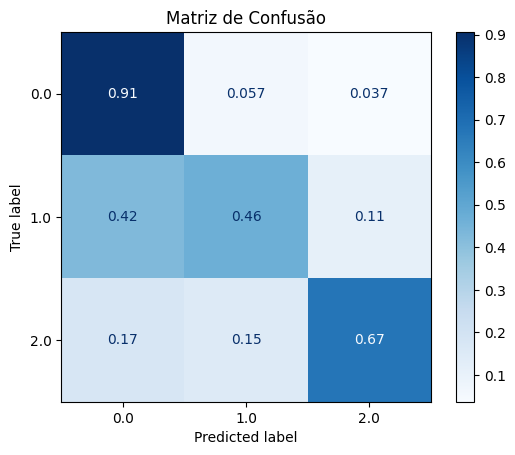

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = catboost_model.predict(X_test_scaled)

# Calcular F1 Score
f1 = f1_score(y_test, y_pred, average='macro')

# Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Exibir os resultados
print(f"Modelo: CatBoosting")
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia: {accuracy:.2f}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
ConfusionMatrixDisplay.from_estimator(catboost_model, X_test_scaled, y_test, cmap='Blues',normalize='true')
plt.title(f'Matriz de Confusão')
plt.show()
print("\n")